<a href="https://colab.research.google.com/github/naorJR/IP-Labs/blob/ortra/Lab%202/ex2_final_301613501_208560086.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Lab 2 – Basic Image Processing Techniques and Color Spaces
 

**Mount to Google Drive**

In [29]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Change working directory to lab folder**
*   Tip: use the *%ls* command to view files within the working directory.

In [30]:
%cd '/content/drive/My Drive/IP Labs/2'
import os
path = os.getcwd() 
print('path: ' + path)

/content/drive/My Drive/IP Labs/2
path: /content/drive/My Drive/IP Labs/2


**Import the necessary libraries for Lab 2:**

In [31]:
%matplotlib inline 
import numpy as np
import cv2
import matplotlib.pylab as plt
from skimage import transform,io,color
from skimage.transform import resize,rescale,rotate
from sklearn import cluster
from sklearn.utils import shuffle
from skimage import img_as_ubyte

Load the image of your choise as **gray scale** image (replace lenna).

Image shape:(1800, 1200), Image data type:uint8


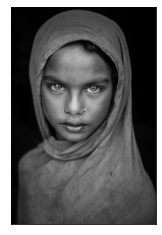

In [32]:
img = color.rgb2gray(io.imread('portrait.jpeg'))
img = img_as_ubyte(img)
print ('Image shape:{}, Image data type:{}'.format(img.shape,img.dtype))
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X & Y axis
plt.show()

**Follow the instractions in each section:**

## Part 1 – Basic Image Processing Techniques
___

**Resizing (Scaling) and Rotation**

__Note__: In this experiment the same scaling factor is applied twice - in  vertical and in horizontal directions.  
* Resize your image by two scaling factors: **½ and 2**, using **nearest neighbor and bilinear** interpolation methods (4 outputs in total). Use _resize_ or _rescale_ from _skimage.transform_ library.
* Plot the four outputs with the relevant title for each. you can zoom on detailed area to make the differences more visible if needed (i.g. takeing 100x100 size part by *numpy slicing*).
* Observe the differences between the 2 interpolation methods and explain the results. 

In [33]:
class Images():
    def __init__(self, image, title):
        self.image = image
        self.title = title

def plotImages(images,dim,size=(10, 7.5)):                                               
  fig, ax = plt.subplots(dim[0],dim[1],figsize=size)
  ax = ax.ravel()
  for i,image in enumerate(images):
    ax[i].imshow(image.image, cmap='gray')
    ax[i].set_title(image.title)
    ax[i].set_xlabel('Width [px]')
    ax[i].set_ylabel('Height [px]')
  
  plt.tight_layout()
  plt.show()

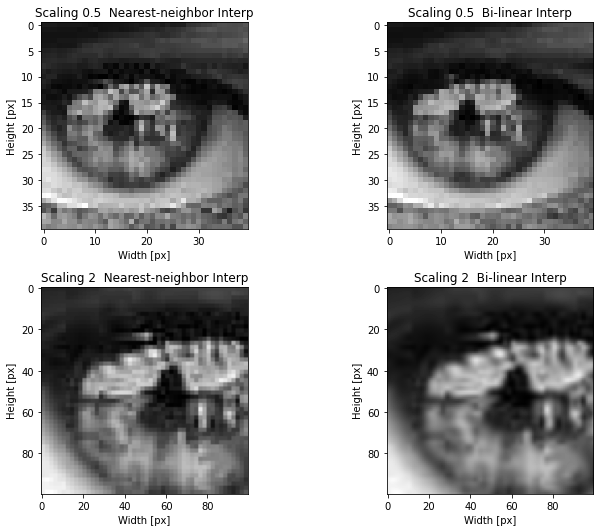

In [34]:
d = {}
d[0] = 'Nearest-neighbor'
d[1] = 'Bi-linear'

s_img = []
s_img.append(Images(rescale(img,0.5,order = 0 , anti_aliasing= 0)[320:360,325:365], "Scaling 0.5  " + d[0] + " Interp" ))
s_img.append(Images(rescale(img,0.5,order = 1 , anti_aliasing= 0)[320:360,325:365], "Scaling 0.5  " + d[1] + " Interp"  ))
s_img.append(Images(rescale(img,2,order = 0 , anti_aliasing= 0)[1300:1400, 1300:1400], "Scaling 2  " + d[0] + " Interp"  ))
s_img.append(Images(rescale(img,2,order = 1 , anti_aliasing= 0)[1300:1400, 1300:1400], "Scaling 2  " + d[1] + " Interp"  ))

plotImages(s_img,[2,2])

Write your answer here 

### **Answer no.1**
---
While we are resizing an image, we are changing the number of pixels. In the case of enlarging the image, we need to estimate the values of the missing pixels, so we do so with interpulation. The nearest neighbor means a zero order interpulation, which means the interpulation function is constant and it takes the same value of the nearest neighbor for the new pixel. with the 1st order interpulation, called - 1 bi linear - there is linear estimation for the value of the new pixels.In 2d images the bi linear interpolation is performed using linear interpolation first in one direction, and then again in the other direction

In the other case, that we are sampling  the image.we know that sampling can casue aliasing,in order to avoid that we can apply low pass filter on  the signal (in that case the image) . there are many filters that can do this job - mean filter , gaussain and more. the gaussain fillter is the most common in image processing for this case and and the function rescale has a built in option to apply gaussing filter on the image before the sampling.

When we down sampling both interpolation looks the the same ' unlike the upsampling which the bilinear interpolation  gave more smoother result.

---

* Resize your image by scaling factor  **¼** using bilinear interpolation – **once with the default filter and once without a filter**.    
    In order to disable the default filter set the parameter 'anti_aliasing' to false.    
    Show the two output images.
    
    Explain the problem discussed in Part 1, Question 2 of the Preliminary Report: refer to both images (with and without the filter) to demonstrate the problem and its solution.

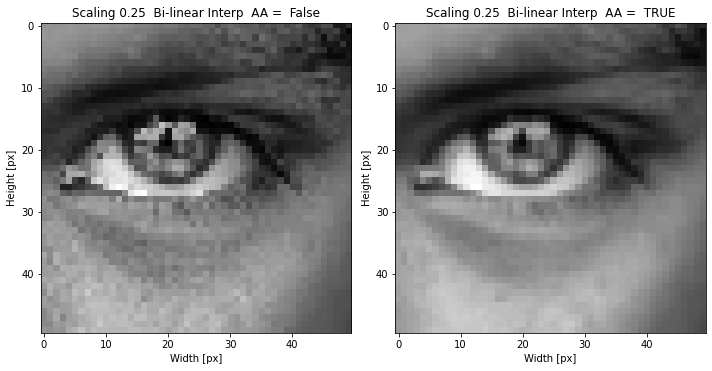

In [35]:
# Insert your code:
a_img = []
a_img.append(Images(rescale(img,0.25,order = 1 , anti_aliasing= 0)[150:200, 150:200], "Scaling 0.25  " + d[1] + " Interp  AA =  False"))
a_img.append(Images(rescale(img,0.25,order = 1 , anti_aliasing= 1)[150:200, 150:200], "Scaling 0.25  " + d[1] + " Interp  AA =  TRUE"))

plotImages(a_img,[1,2])

Write your answer here



### **Answer no.2**
---
In P1-Q3 we're asking about the problem in down-scaling image, and how the resize() function offer a solution by apllying gausian filter on the image prior to the down scaling. In the left image above we can see how the low sampling rate seems, while on the right picture we can see how the pre-filtering affects.


 

Example of Filtered image :

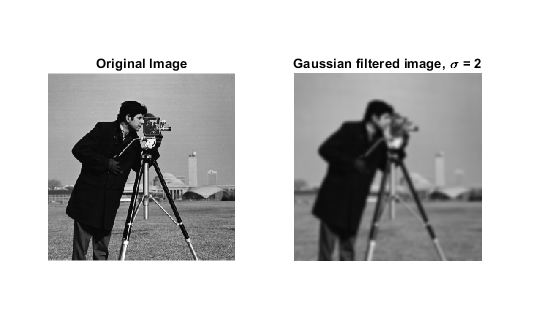

As we can see, the gaussain filter smoothing the image.
Mathematically, we are convolving the gaussain filter with the image, by doing that we basiclly removing all the high "frequencies" in the image (applying a LP filter). 
We know that in 1D sampling the FFT of Gausian function is duplicated to the frequency spectrum, as the same as, applying FFT for 2D signals.
In addition, it is known that FFT of the Gaussain filter is also a Gaussian. 

So, by convolving the image with this filter we applaied a low pass filter that will remove low frequencies that affect allaising.

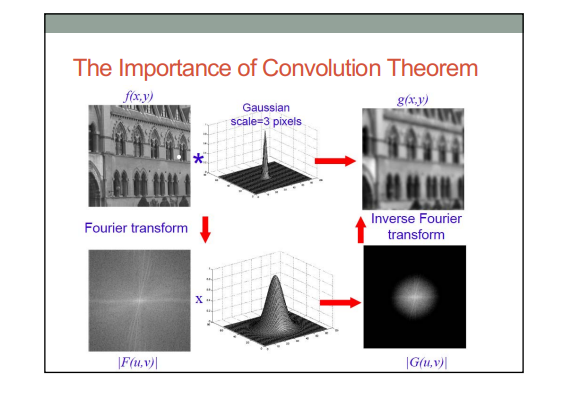)









---






*  Write a function which calculate the RMS distance 
between two images - the calculation given in the main pdf file.

  **Use no loops!**

In [36]:
def calc_RMS(f, f_hat):
  RMS = np.sqrt(np.mean((f-f_hat)**2))
  return RMS

* Use the supplied functiom *resize_im(img, scale, order)* which shrinks and then expands the image by the same factor. Apply this program on the image of your choice with scaling factors of **2, 4, 8, 16, 32** and for each scaling factor calculate the Root Mean Square error (RMS).
 
    Perform the same process for both interpolation methods - **nearest neighbor and bilinear**. Plot the RMS error vs. the scaling factor for both interpolation methods (on the same plot) and explain the plot. Attach several image examples that support your graph plot.

In [37]:
def resize_im(img, scale, method):
    m,n = img.shape
    img_shrink = transform.rescale(img, 1.0/scale , order=method)
    return transform.resize(img_shrink, (m,n), order=method)

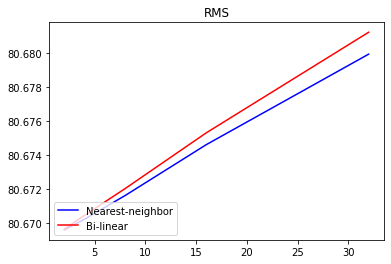

In [38]:
RMS = []
s_img = []
Scaling_factors = [2,4,8,16,32]
for i in range(0,2):
  for s in Scaling_factors :
    RMS.append(calc_RMS(img,resize_im(img,s,i)))
    s_img.append(Images(resize_im(img,s,i), " S =   " + str(s) + " I =  " + d[i] ))

plt.plot(Scaling_factors,RMS[0:5],'b',label = d[0])
plt.plot(Scaling_factors,RMS[5:10],'r',label = d[1])
plt.title("RMS")
plt.legend(loc="lower left")
plt.show()

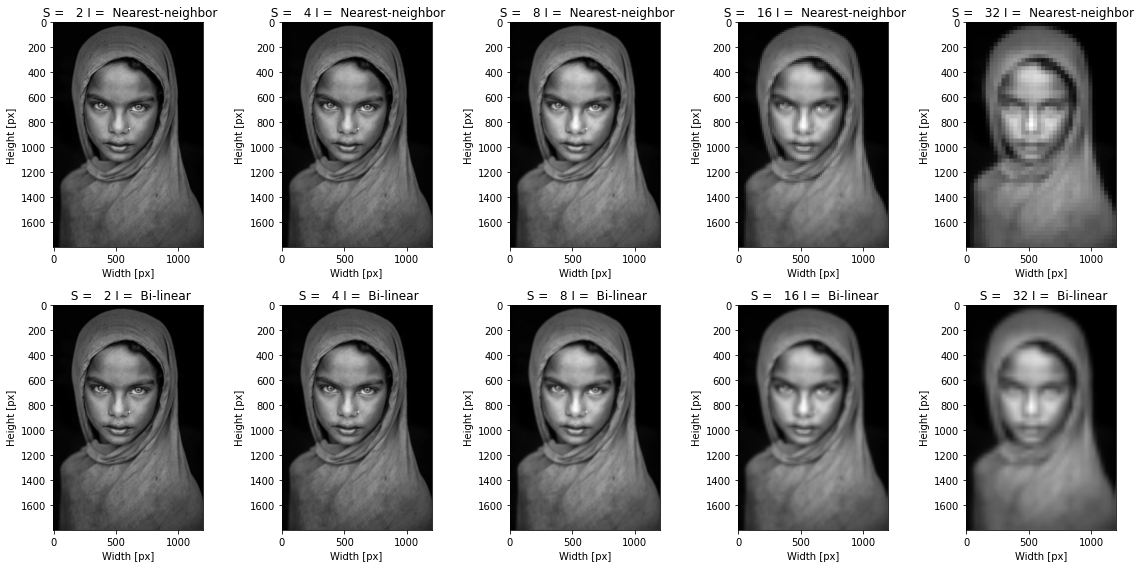

In [39]:
plotImages(s_img,[2,5], (16, 8))

Write your answer here

### **Answer no.3**
---
On this specific image, we can see that the NN interpolation gives a better RMS performance compared to the Bi-linear interpolation even though the interpolation order is lower and the images seem smoothers in the Bi-linear interpolation.

We think that the reason for this phenomena is that the linear approximation makes some blurring to  the original pixels, while the NN approximation chooses the  values from the original image.

---



* Apply imrotate function to rotate the image of your choice by **30, 60 and -45 degrees** using **nearest neighbor and bilinear** interpolation methods. Observe the differences between the 2 interpolation methods (you can zoom on detailed area if needed). Explain why an interpolation is needed.

In [40]:
r_img = []
theta = [30,60,-45]
for i in range(0,2):
  for a in theta :
    r_img.append(Images(rotate(img, a ,order = i), r'$\theta=$' + str(a) + " I = " + d[i] ))

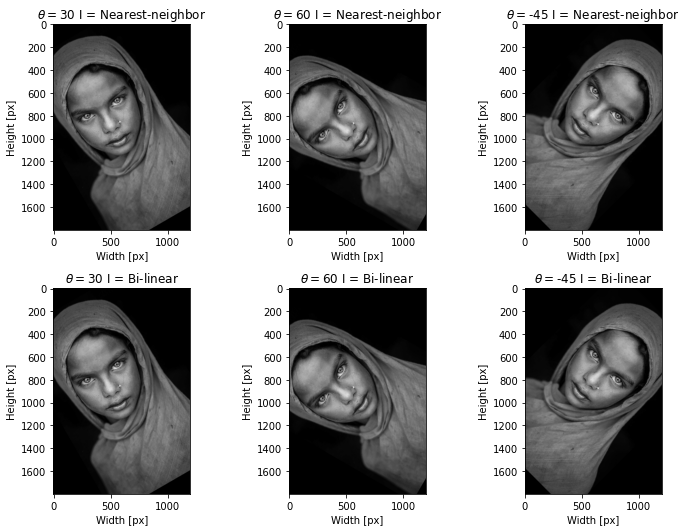

In [41]:
plotImages(r_img,[2,3])

Write your answer here:


### Answer no.4
---
In a standard image rotation we are tranform each pixel from polar coordination system to cartesian system, as we described in the preliminary report.
Therefore, as a result of the float to int rounding, there might be holes in the new rotated image.



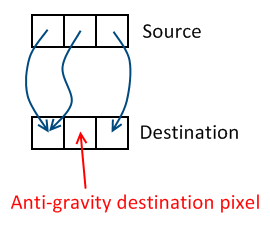

In image rotation procces, instead of assign source pixels to destination pixels locations we assign destination pixels from source pixels.

When we assinging source pixels to destination, there might be source pixels that have the same calculated destination pixel (due to sine and cosine and rounding). This also implies that there might be anti-gravity destination pixels that no source pixel can ever matched to.

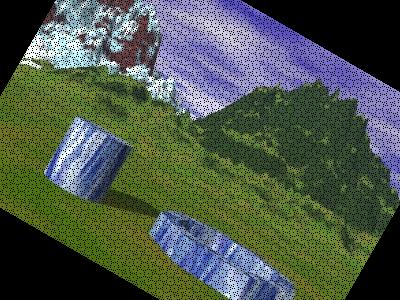

When we use destination-from-source method there are No missing pixels. It's still sort of grainy though. This is because some of the destination pixels get their values from the same source pixel, so there might be 2 side-by-side destination pixels with the same colour. This gives mini blocks of identical colour in the result, which on the whole, gives an unpolished look.

In order to avoid that destination pixels will get their values from the same source we can assign destination pixels from source pixels with interpolation . in that case each destination pixel is interpolation of pixels from the source images which will result in slightly smoother results:

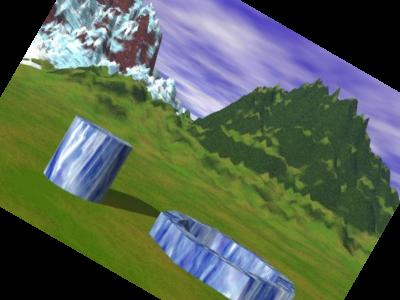

---


## Part 2 – Color Space Conversion
___

1. Open an image of your choice and show the histograms and images for the R, G, B components. Use the supplied function *plot_RGB(img)*. Note, you should load a color image of your choise (use cv2.imread).

In [42]:
# Supplied function - 
def plot_RGB(img):
    plt.imshow(img)
    plt.title('Regular image')
    plt.show()

    b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
    plt.figure(figsize=(20,15))
    plt.subplot(322)
    plt.imshow(b,cmap='gray')
    plt.title("Blue")
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(324)
    plt.imshow(g,cmap='gray')
    plt.title("Green")
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(326)
    plt.imshow(r,cmap='gray')
    plt.title("Red")
    plt.subplots_adjust(hspace=0.5)

    color = ('b','g','r')
    titles = ("Blue","Green" ,"Red")
    for i,col in enumerate(color):
        histr = cv2.calcHist([img[:,:,i]],[0],None,[256],[0,256])
        plt.subplot(i*2+321)                             # 311 -> plot in the first cell
        plt.plot(histr,color = col)
        plt.xlim([0,256])
        plt.subplots_adjust(hspace=.5)
        plt.title(str(titles[i]))

    plt.show()

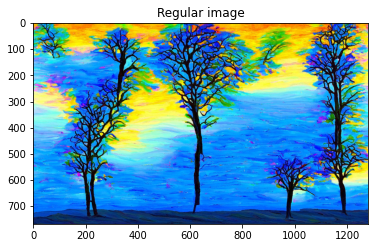

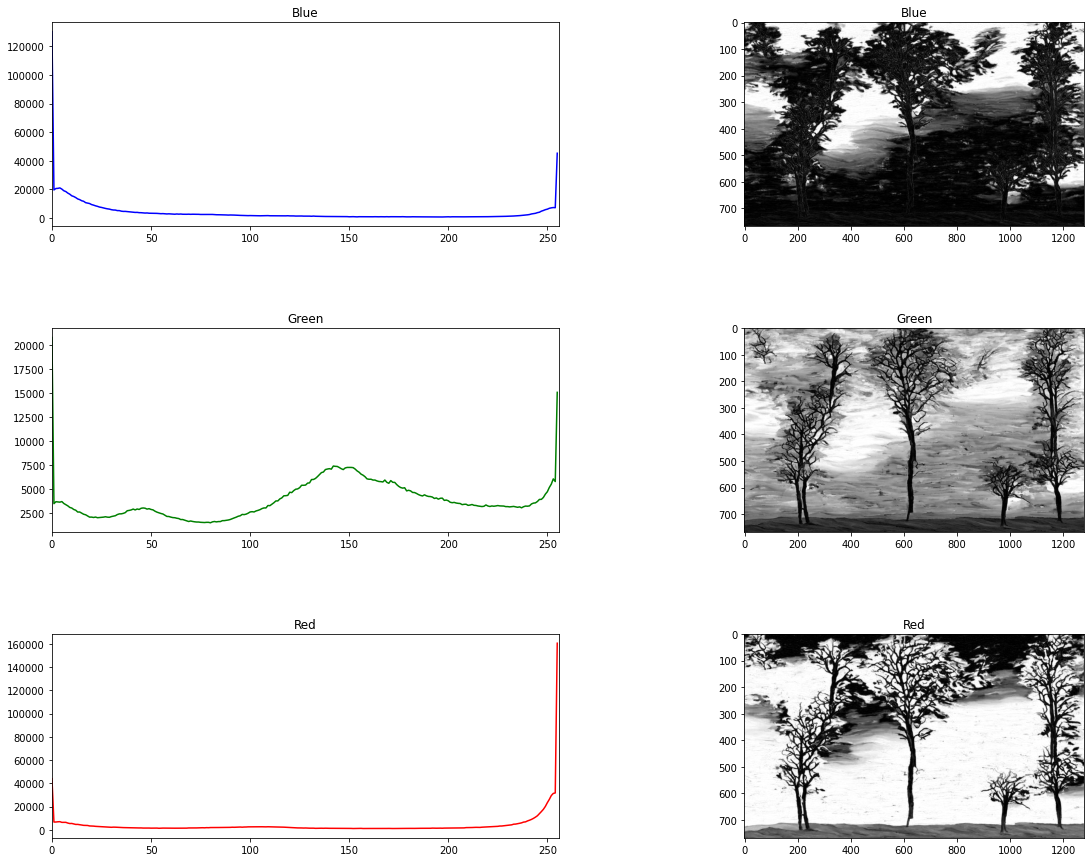

In [43]:
img = cv2.imread('/content/drive/My Drive/IP Labs/2/aws_ai.jpeg')
plot_RGB(img)

* Does the 'Regular image' looks as you expected? if not please explain why. (Hint: what is the color space of the image that plt.imshow gets as input).

* Explain the results in the graphs and in the grayscale images.

Write your answer here :



### **Answer no.5**
---
No. 
Actually, the "regular" image looks with strange colors that after some researching, we discovered that the the red colors have blue colors and also in the other direction, but the green stays green. So, we've learned that the plt.imshow() got RGB colorspace while the openCV lib uses BGR colorspace.

In the graphs we are seeing a histogram for each of the (R,G,B) colors, which means how many pixels got the same shades in each channel.

In the red channel most of the backgorund is white and thats becasue that in the original image the backgorund is mostly red. the same apply for the sky in the blue channel.
we also can see in the blue and red histogram that the 2 high peaks are the 255 and 0 shades which represnt black and white as we learned in the pervious lab. in the green channel we see some peak in the middle and it fits to the image which are less "black  & white " as in the red and blue channel

---


2.	Plot the 'Regular image' in the correct way as you expected  to get (use cv2.cvtColor command).

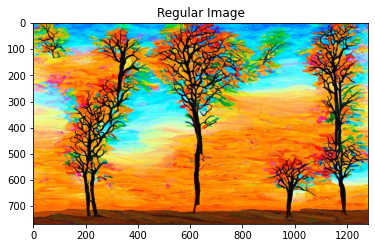

In [44]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Regular Image")
plt.show()

3. Write a RGB to grayscale conversion function according to the formula from the preliminary report. You may use the cv2.split method.

Y = 0.299 R + 0.587 G + 0.114 B

In [45]:
def RGB2Grayscale(img):
  r,g,b = cv2.split(img)
  grayscale_image = 0.299*r+0.587*g + 0.114*b

  return grayscale_image


4.	Convert the image to grayscale using the RGB2Grayscale function that you created. Show the output using plt.imshow(grayscale_image). The grayscale image should look good.

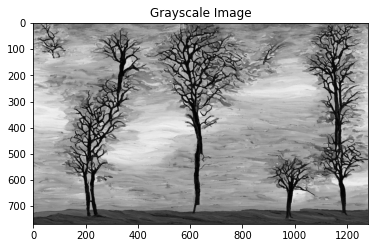

In [46]:
grayscale_image = RGB2Grayscale(img)
plt.imshow(grayscale_image,cmap = 'gray')
plt.title("Grayscale Image")
plt.show()

5.	Convert the image to the HSV color space (use cv2.cvtColor command), and show it with plt.imshow(HSV_image).

https://www.rapidtables.com/convert/color/rgb-to-hsv.html

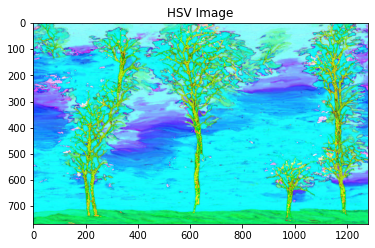

In [47]:
HSV_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV_FULL )
plt.imshow(HSV_image,cmap = 'hsv')
plt.title("HSV Image")
plt.show()

6.	Show the images and the histograms of the 3 components in the HSV color space.

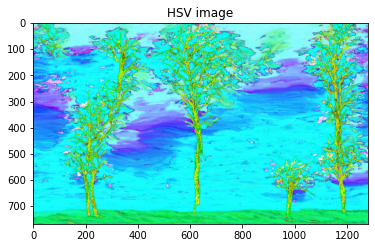

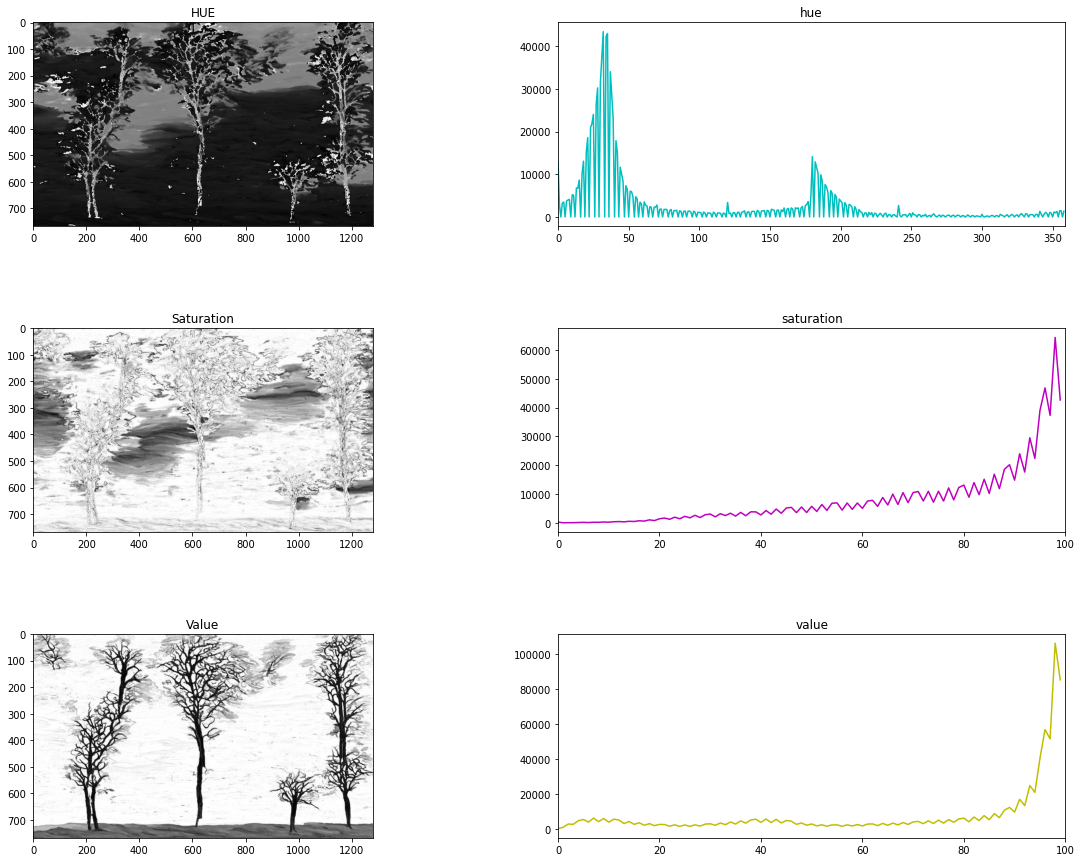

In [52]:
# Insert your code:
def plot_HSV(img):
    plt.imshow(img)
    plt.title('HSV image')
    plt.show()

    H, S, V = img[:,:,0], img[:,:,1], img[:,:,2]
    plt.figure(figsize=(20,15))
    plt.subplot(321)
    plt.imshow(H,cmap='gray')
    plt.title("HUE")
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(323)
    plt.imshow(S,cmap='gray')
    plt.title("Saturation")
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(325)
    plt.imshow(V,cmap='gray')
    plt.title("Value")
    plt.subplots_adjust(hspace=0.5)

    color = ('c','m','y')
    titles = ("hue","saturation" ,"value")
    for i,col in enumerate(color):

      if (i==0):
        histr = cv2.calcHist([np.round((img[:,:,i].astype(np.uint16)/255)*359).astype(np.uint16)],[0],None,[359],[0,359])
        plt.subplot(i*2+322)
        plt.plot(histr,color = col)
        plt.xlim([0,359])
        plt.subplots_adjust(hspace=.5)
        plt.title(str(titles[i]))
      else:
        histr = cv2.calcHist( [np.round(((img[:,:,i])/256)*100).astype(np.uint16)],[0],None,[100],[0,100])
        plt.subplot(i*2+322)
        plt.plot(histr,color = col)
        plt.xlim([0,100])
        plt.subplots_adjust(hspace=.5)
        plt.title(str(titles[i]))

    plt.show()
plot_HSV(HSV_image)

* Explain the results in the graphs and in the grayscale images.

Write your answer here



### **Answer no.6**
---
Since we worked with Uint8 image, we converted the Hue values to type Uint16 in order to normalize the histogram values according to the theorecal HSV values(0-359[degrees], 0-100[%], 0-100[%]).

From the graphs and the grayscale images we can see:

Most of the bits are felt in enviroment of hue around H=40 (orange) and H=180 (cyan) values. We can estimate this also by the grayscale image because it is very dark as a result of that most of the pixels has low value.

Regarding to the saturation and value, we can say that the saturation and the value both are very high in this image. from the graph we can see that because most of the pixles are close to 100% and in the grayscale images we can see that by the dominant "white" color. 

---

Color Histogram Equalization

Show the histogram-equalized color image. In this case, the histogram equalization is performed separately on all 3 layers (R, G, B). Use the supplied function hist_eq_rgb

In [53]:
# Supplied function - 
def hist_eq_rgb(img):
    
    print("image shape: ", img.shape)
    plt.imshow(img)
    plt.show()
    R, G, B = cv2.split(img)
    R_eq = cv2.equalizeHist(R)
    G_eq = cv2.equalizeHist(G)
    B_eq = cv2.equalizeHist(B)

    
    fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(30, 20))
    ax[0,0].imshow(R, cmap = 'gray'); ax[0,0].set_title('Red channel')
    ax[1,0].imshow(G, cmap = 'gray'); ax[1,0].set_title('Green channel')
    ax[2,0].imshow(B, cmap = 'gray'); ax[2,0].set_title('Blue channel')
    ax[0,1].hist(R.flatten(),256,[0,256], color = 'r'); ax[0,1].set_title('Red channel histogram')
    ax[1,1].hist(G.flatten(),256,[0,256], color = 'g'); ax[1,1].set_title('Green channel histogram')
    ax[2,1].hist(B.flatten(),256,[0,256], color = 'b'); ax[2,1].set_title('Blue channel histogram')
    
    ax[0,2].imshow(R_eq, cmap = 'gray'); ax[0,2].set_title('Red channel after histogram equalization')
    ax[1,2].imshow(G_eq, cmap = 'gray'); ax[1,2].set_title('Green channel after histogram equalization')
    ax[2,2].imshow(B_eq, cmap = 'gray'); ax[2,2].set_title('Blue channel after histogram equalization')
    ax[0,3].hist(R_eq.flatten(),256,[0,256], color = 'r');ax[0,3].set_title('Red channel histogram after histogram equalization')
    ax[1,3].hist(G_eq.flatten(),256,[0,256], color = 'g');ax[1,3].set_title('Green channel histogram after histogram equalization')
    ax[2,3].hist(B_eq.flatten(),256,[0,256], color = 'b');ax[2,3].set_title('Blue channel histogram after histogram equalization')
    
    
    
    img_eq = cv2.merge((R_eq,G_eq,B_eq))
    plt.figure()
    
    plt.imshow(img_eq)
    plt.title('The image after histogram equalization on all 3 layers (R, G, B)')
    plt.show()

image shape:  (768, 1280, 3)


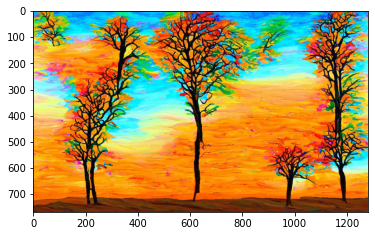

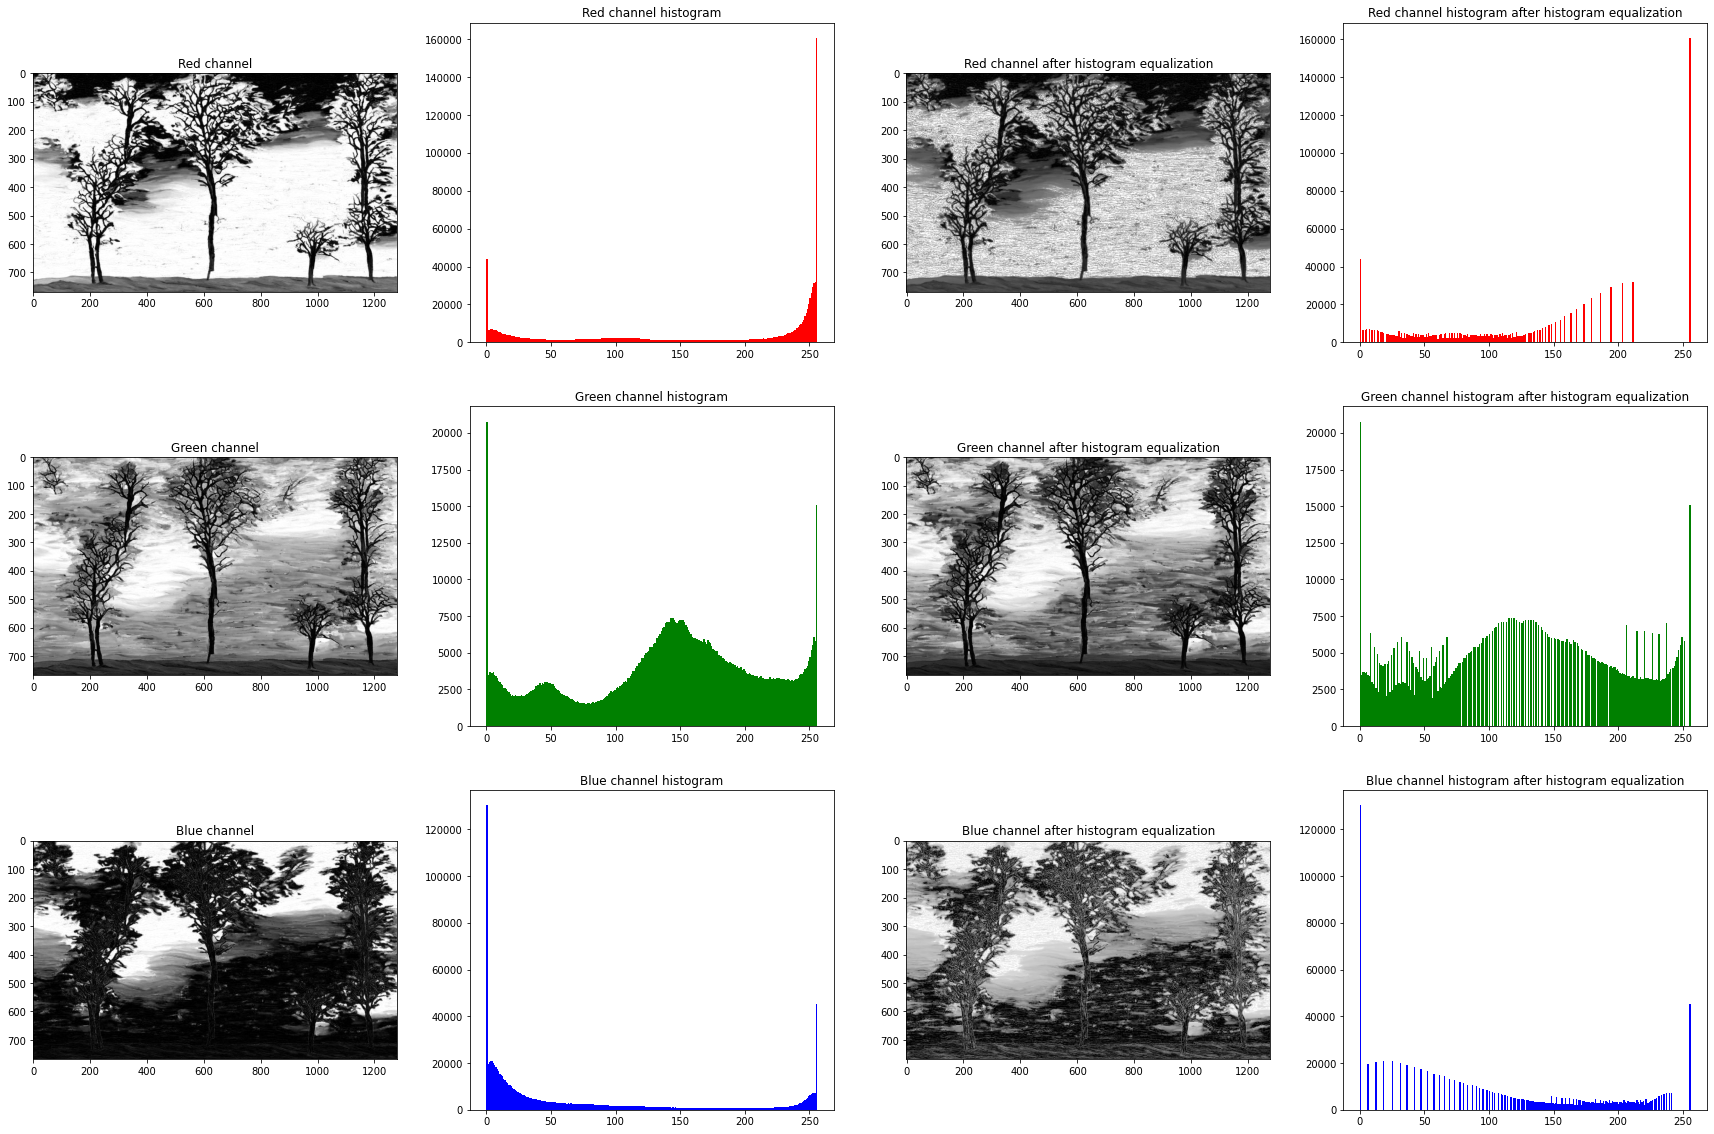

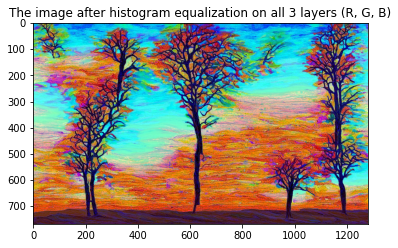

In [54]:
# Insert your code:
hist_eq_rgb(img)



*  Explain the results.



Write your answer here


### **Answer no.7**
---
The RGB equalization process above takes each channel and change its pixeles adjusment so that it will cover the fully range of the each histogram equaly. It can be clearly explained by looking on the grayscale images of each channel, that seems much beter after the equalization process.

But, at the and, after the function combines all the channgel together after the equalization, we can see that the colored image bacame with very high contrast.

---


Perform the histogram equalization each time on one of the H, S, V components (the other 2 components remain unchanged), generating 3 color images. (Hint: in order to display on the monitor the color image that was created in HSV space, you have to convert the image back to RGB space).

In [55]:
# Insert your code:
def hist_eq_hsv(img):
    H, S, V = cv2.split(img)
    H_eq = cv2.equalizeHist(H)
    S_eq = cv2.equalizeHist(S)
    V_eq = cv2.equalizeHist(V)
    e_img = []
    img_eq = cv2.cvtColor(cv2.merge((H,S,V)), cv2.COLOR_HSV2RGB_FULL)
    e_img.append(Images(img_eq, " NO Equalization" ))
    img_eq = cv2.cvtColor(cv2.merge((H_eq,S,V)), cv2.COLOR_HSV2RGB_FULL)
    e_img.append(Images(img_eq, " HUE Equalization" ))
    img_eq = cv2.cvtColor(cv2.merge((H,S_eq,V)), cv2.COLOR_HSV2RGB_FULL)
    e_img.append(Images(img_eq, " SATURATION Equalization" ))
    img_eq = cv2.cvtColor(cv2.merge((H,S,V_eq)), cv2.COLOR_HSV2RGB_FULL)
    e_img.append(Images(img_eq, " VALUE Equalization" ))
    return e_img
    


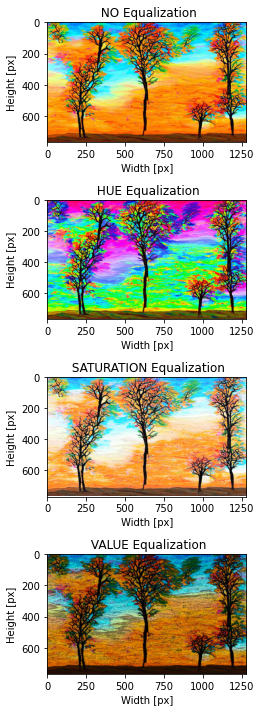

In [56]:
e_img = hist_eq_hsv(HSV_image)
plotImages(e_img,[4,1], (15,10))

---
histogram equalization of the 'Hue' and 'Saturation' component is not recommended, because these two factors holds the color information of the image.
the value refers to the relative lightness or darkness of a color. We perceive color value based on the quantity of light reflected off of a surface and absorbed by the human eye. as we see in the images the equalization on the value chanel increases the  contrast of the image unlike the 2 other components which spread the color range and his intesnsity

---